# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [1]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [5]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# 2. Data cleaning
# 2.1. Check the missing values
# print(titanic.shape)
# print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titanic["age"].fillna(titanic["age"].mean(), inplace=True)

# 2.3 Drop the rows with missing values in embarked
titanic.dropna(subset=["embarked"], inplace=True)

# 2.4 Drop the deck column
titanic.drop(columns=["deck"], inplace=True)

/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_3397/1714097027.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].mean(), inplace=True)


KeyError: "['deck'] not found in axis"

In [19]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# 3 Analyse data

In [110]:
# 3.1 Calculate the overall survival rate of the Titanic passengers
survival_rate = titanic["survived"].mean() * 100
print(f"{survival_rate:.2f}")

38.25


In [36]:
# 3.2 Analyze the distribution of passengers by class (Pclass) and by port of embarkation (Embarked).
#distribution_by_class = titanic.groupby(["pclass", "embarked"]).size()
distribution_by_class = titanic.groupby(["pclass", "embarked"]).size().reset_index(name="count")
distribution_by_class['Percentage'] = (distribution_by_class["count"] / distribution_by_class.groupby('pclass')["count"].transform('sum')) * 100
distribution_by_class

,pclass,embarked,count,Percentage
0,1,C,85,39.719626
1,1,Q,2,0.934579
2,1,S,127,59.345794
3,2,C,17,9.239130
4,2,Q,3,1.630435
5,2,S,164,89.130435
6,3,C,66,13.441955
7,3,Q,72,14.663951
8,3,S,353,71.894094


In [47]:
# 3.3 Calculate the proportion of male and female passengers.
total = len(titanic)
female_proportion = len(titanic[titanic.sex == "female"]) / len(titanic)
# male_proportion = 100 - female_proportion
# print("female", female_proportion)
# print("male", male_proportion)

gender_proportion = pd.Series([female_proportion, 1-female_proportion], index=["female", "male"], name="gender_proportion")
gender_proportion

female    0.350956
male      0.649044
Name: gender_proportion, dtype: float64

In [54]:
# 3.4.1 Identify the age distribution of passengers and find the most represented age categories.
age_distribution = titanic.age.value_counts().sort_index()
most_represented_age_categories = age_distribution.idxmax()
print(f"Age distribution: \n{age_distribution}", end="\n\n")
print(f"Most represented age categories: {most_represented_age_categories}")

Age distribution: 
age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 89, dtype: int64

Most represented age categories: 29.69911764705882


In [72]:
# 3.4.2 Identify the age distribution of passengers and find the most represented age categories.
# Create age categories
bins = [0, 18, 30, 50, 100]  # Define your age bins as needed
labels = ['0-17', '18-29', '30-49', '50+']  # Label each bin

# Cut the 'Age' column into the specified bins
titanic['age_category'] = pd.cut(titanic['age'], bins=bins, labels=labels)
print(titanic.age_category.value_counts().sort_index())
print(titanic["age_category"].value_counts().sort_index() / len(titanic))
print(titanic["age_category"].value_counts().describe())
print(list(titanic["age_category"].value_counts().sort_index()))

age_category
0-17     139
18-29    447
30-49    240
50+       63
Name: count, dtype: int64
age_category
0-17     0.156355
18-29    0.502812
30-49    0.269966
50+      0.070866
Name: count, dtype: float64
count      4.000000
mean     222.250000
std      166.451945
min       63.000000
25%      120.000000
50%      189.500000
75%      291.750000
max      447.000000
Name: count, dtype: float64
[139, 447, 240, 63]


In [81]:
titanic.groupby(["age_category"]).describe()

/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_3397/3212411100.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(["age_category"]).describe()


survived                                              pclass  \
                count      mean       std  min  25%  50%  75%  max  count   
age_category                                                                
0-17            139.0  0.503597  0.501795  0.0  0.0  1.0  1.0  1.0  139.0   
18-29           447.0  0.331096  0.471135  0.0  0.0  0.0  1.0  1.0  447.0   
30-49           240.0  0.420833  0.494725  0.0  0.0  0.0  1.0  1.0  240.0   
50+              63.0  0.333333  0.475191  0.0  0.0  0.0  1.0  1.0   63.0   

                        ... parch        fare                                \
                  mean  ...   75%  max  count       mean        std     min   
age_category            ...                                                   
0-17          2.561151  ...   2.0  3.0  139.0  32.500721  40.759691  6.4958   
18-29         2.489933  ...   0.0  4.0  447.0  25.187274  39.491625  0.0000   
30-49         2.033333  ...   0.0  6.0  240.0  41.862205  67.760483  0.0000   
50+           1.555556  ...   0.0  4.0   63.0  43.027117  43.853694  6.2375   

                                                    
                   25%     50%       75%       max  
age_category                                        
0-17          10.81665  20.250  32.19375  262.3750  
18-29          7.79580   9.825  25.46670  263.0000  
30-49          8.66250  23.575  50.87185  512.3292  
50+           12.76250  26.550  61.67920  263.0000  

[4 rows x 48 columns]

# 4 Alives analyse

In [97]:
# 4.1 Analyze survival based on ticket class (Pclass).
survival_by_class = titanic.groupby(["pclass", "survived"]).size().reset_index(name="count")
survival_by_class['Percentage'] = survival_by_class["count"] / survival_by_class.groupby('pclass')["count"].transform('sum') * 100
survival_by_class = titanic.groupby('pclass')['survived'].value_counts(normalize=True).unstack() * 100
survival_by_class.round(decimals=3)

survived,0,1
pclass,,
1,37.383,62.617
2,52.717,47.283
3,75.764,24.236


In [100]:
# 4.2 Analyze survival based on gender (Sex).
survival_by_gender = titanic.groupby(["sex", "survived"]).size().reset_index(name="count")
survival_by_gender = titanic.groupby('sex')['survived'].value_counts(normalize=True).unstack() * 100
survival_by_gender.round(decimals=3)

survived,0,1
sex,,
female,25.962,74.038
male,81.109,18.891


In [105]:
# 4.3 Analyze survival based on age.
print("\n\n======== 4.3 Analyze survival based on age. =========")
survival_by_age = titanic.groupby(["age", "survived"]).size().reset_index(name="count")
survival_by_age['Percentage'] = survival_by_age["count"] / survival_by_age.groupby('age')["count"].transform('sum') * 100
#print(f"Survival by age: \n{survival_by_age}", end="\n\n")

survival_by_age = titanic.groupby('age')['survived'].value_counts(normalize=True).unstack() * 100
#print(survival_by_age)

# Create age categories
bins = [0, 18, 30, 50, 100]  # Define your age bins as needed
labels = ['0-17', '18-29', '30-49', '50+']  # Label each bin

# Cut the 'Age' column into the specified bins
titanic['Age_Category'] = pd.cut(titanic['age'], bins=bins, labels=labels, right=False)
print(titanic['Age_Category'].value_counts())

# Calculate survival rates in each age category
survival_by_age = titanic.groupby('Age_Category')['survived'].value_counts(normalize=True).unstack() * 100

# Print the result
print(survival_by_age.round(decimals=3))



======== 4.3 Analyze survival based on age. =========
Age_Category
18-29    448
30-49    255
0-17     113
50+       73
Name: count, dtype: int64
survived           0       1
Age_Category                
0-17          46.018  53.982
18-29         67.188  32.812
30-49         58.431  41.569
50+           64.384  35.616


/var/folders/w3/5hy6_w9d52l2jjrccrpq3z0h0000gn/T/ipykernel_3397/886578706.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = titanic.groupby('Age_Category')['survived'].value_counts(normalize=True).unstack() * 100


In [107]:
# 4.4 Analyze survival based on port of embarkation (Embarked).
print("\n\n======== 4.4 Analyze survival based on port of embarcation (Embarked). =========")
survival_by_port = titanic.groupby(["embarked", "survived"]).size().reset_index(name="count")
survival_by_port['Percentage'] = survival_by_port["count"] / survival_by_port.groupby('embarked')["count"].transform('sum') * 100
print(f"Survival by port: \n{survival_by_port}", end="\n\n")

survival_by_embarkation = titanic.groupby('embarked')['survived'].value_counts(normalize=True).unstack() * 100
print(survival_by_embarkation.round(decimals=3))



======== 4.4 Analyze survival based on port of embarcation (Embarked). =========
Survival by port: 
  embarked  survived  count  Percentage
0        C         0     75   44.642857
1        C         1     93   55.357143
2        Q         0     47   61.038961
3        Q         1     30   38.961039
4        S         0    427   66.304348
5        S         1    217   33.695652

survived       0       1
embarked                
C         44.643  55.357
Q         61.039  38.961
S         66.304  33.696


In [108]:
# 4.5 Analyze survival based on family size.
print("\n\n======== 4.5 Analyze survival based on family size. =========")
survival_by_family_size = titanic.groupby(["sibsp", "survived"]).size().reset_index(name="count")
survival_by_family_size['Percentage'] = survival_by_family_size["count"] / survival_by_family_size.groupby('sibsp')["count"].transform('sum') * 100
print(f"Survival by family size: \n{survival_by_family_size}", end="\n\n")



======== 4.5 Analyze survival based on family size. =========
Survival by family size: 
    sibsp  survived  count  Percentage
0       0         0    398   65.676568
1       0         1    208   34.323432
2       1         0     97   46.411483
3       1         1    112   53.588517
4       2         0     15   53.571429
5       2         1     13   46.428571
6       3         0     12   75.000000
7       3         1      4   25.000000
8       4         0     15   83.333333
9       4         1      3   16.666667
10      5         0      5  100.000000
11      8         0      7  100.000000



# 5 Plottings

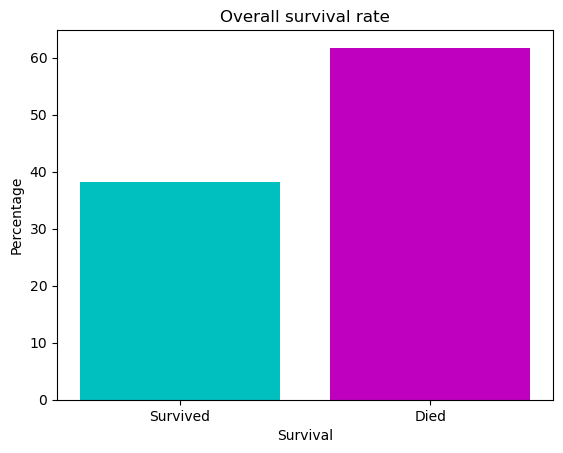

In [115]:
# 5.1 Create a bar chart (plt.bar) to visualize the overall survival rate.
plt.bar(["Survived", "Died"], [survival_rate, 100 - survival_rate], color=["c", "m"])
plt.title("Overall survival rate")
plt.xlabel("Survival")
plt.ylabel("Percentage")
plt.show()

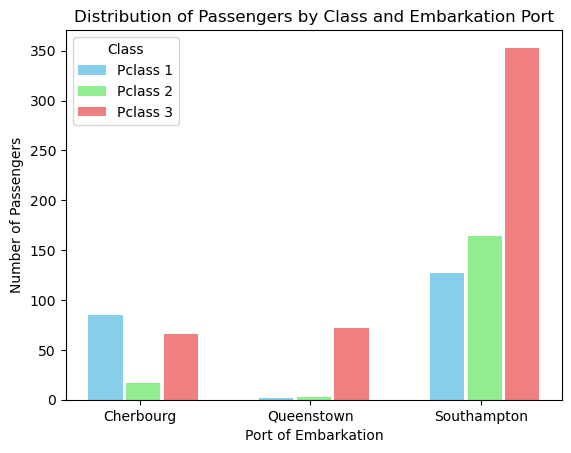

In [125]:
# 5.2 Generate a bar chart (plt.bar) to show the distribution of passengers by class (Pclass) and port of embarkation (Embarked).
# Create a DataFrame with the distribution of passengers by Pclass and Embarked
distribution_by_class_embarked = titanic.groupby(['pclass', 'embarked']).size().unstack()

fig, ax = plt.subplots()
width = 0.2
class_labels = distribution_by_class_embarked.columns.map(lambda port_letter: embarked_labels.get(port_letter))

for i, (pclass, color) in enumerate(zip(distribution_by_class_embarked.index, ['skyblue', 'lightgreen', 'lightcoral'])):
  positions = list(range(len(class_labels))) if i == 0 else [pos + width + 0.02 for pos in positions]
  plt.bar(positions, distribution_by_class_embarked.loc[pclass], width=width, label=f"Pclass {pclass}", color=color)

# Adding labels and title
plt.title('Distribution of Passengers by Class and Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.xticks([pos + width for pos in range(len(class_labels))], class_labels)
plt.legend(title='Class')
plt.show()

In [ ]:
# 5.3 Create a scatter plot (plt.scatter) to represent the relationship between age (Age) and ticket price (Fare) as a function of survival
# If 'Age' or 'Fare' have missing values, you might want to fill or drop them

# plotting for non-survivors
plt.scatter(
  titanic[titanic.survived == 0].age,
  titanic[titanic.survived == 0].fare,
  color="r", label="Not Survived", alpha=0.5
)

In [ ]:
# 6 Bonus for the datascients experts ;P